# 📊 User Engagement Analysis

This notebook explores how user sentiment correlates with social media engagement metrics, specifically **likes** and **retweets**. We analyze distribution patterns, average engagement by sentiment, and sentiment patterns among high-engagement posts.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('data/data.csv')
df = df[['Sentiment', 'Likes', 'Retweets']].dropna()

# Basic statistics
df[['Likes', 'Retweets']].describe()

,Likes,Retweets
count,732.000000,732.000000
mean,42.901639,21.508197
std,14.089848,7.061286
min,10.000000,5.000000
25%,34.750000,17.750000
50%,43.000000,22.000000
75%,50.000000,25.000000
max,80.000000,40.000000


## 1. Distribution of Likes and Retweets

Let’s start by looking at the overall distribution of likes and retweets to understand the general user engagement behavior.

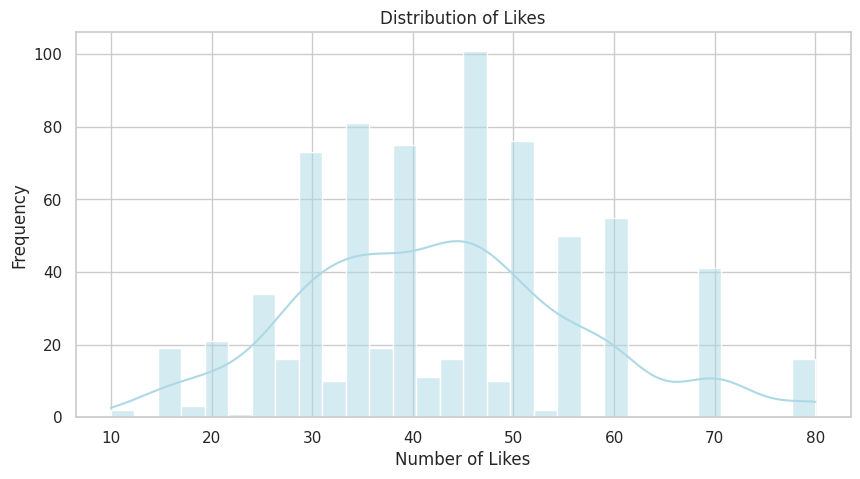

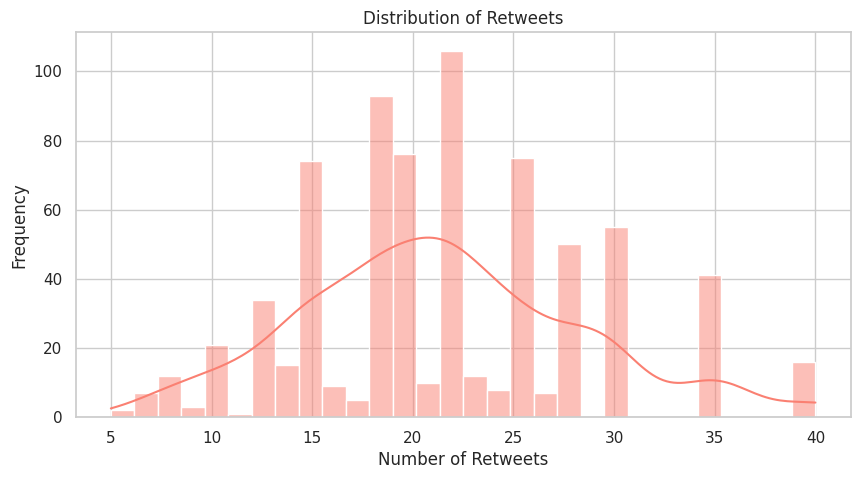

In [2]:
# Likes
plt.figure(figsize=(10,5))
sns.histplot(df['Likes'], bins=30, kde=True, color='lightblue')
plt.title("Distribution of Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Frequency")
plt.show()

# Retweets
plt.figure(figsize=(10,5))
sns.histplot(df['Retweets'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Retweets")
plt.xlabel("Number of Retweets")
plt.ylabel("Frequency")
plt.show()


## 2. Top 15 Sentiments by Combined Engagement

To better understand which emotions generate the most interaction, we analyze the top 15 sentiment categories based on **average likes** and **retweets**. The chart below presents both metrics side-by-side, helping us identify the most engaging emotions on social media.


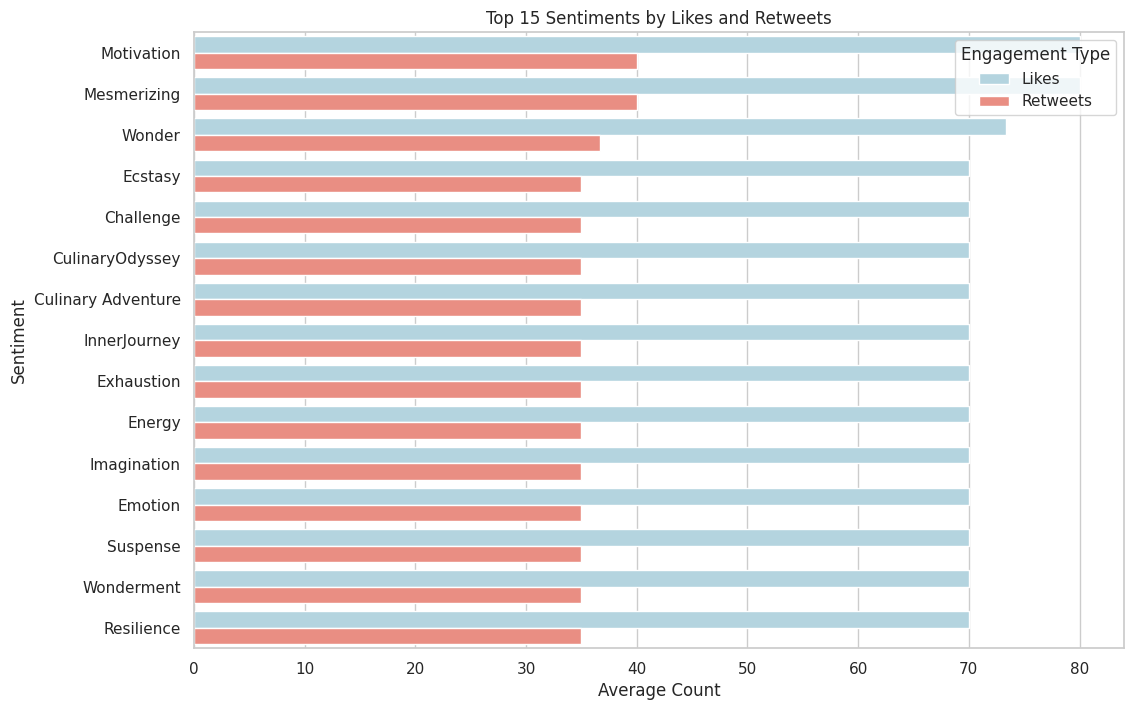

In [3]:
# Step 1: Group by Sentiment and calculate average Likes and Retweets
engagement_by_sentiment = df.groupby('Sentiment')[['Likes', 'Retweets']].mean()

# Step 2: Get top 15 by average Likes
top15 = engagement_by_sentiment.sort_values(by='Likes', ascending=False).head(15).reset_index()

# Step 3: Reshape the dataframe to long format for side-by-side plotting
long_df = pd.melt(top15,
                  id_vars='Sentiment',
                  value_vars=['Likes', 'Retweets'],
                  var_name='Metric',
                  value_name='Average')

# Step 4: Plot grouped bar chart with proper sentiment names
plt.figure(figsize=(12,8))
sns.barplot(data=long_df, x='Average', y='Sentiment', hue='Metric', palette=['lightblue', 'salmon'])
plt.title("Top 15 Sentiments by Likes and Retweets")
plt.xlabel("Average Count")
plt.ylabel("Sentiment")
plt.legend(title="Engagement Type")
plt.show()


## 3. Sentiment Distribution in High-Engagement Posts (>50 Likes)

We define high-engagement posts as those with more than 50 likes. This section explores which sentiments dominate among these highly engaging posts.


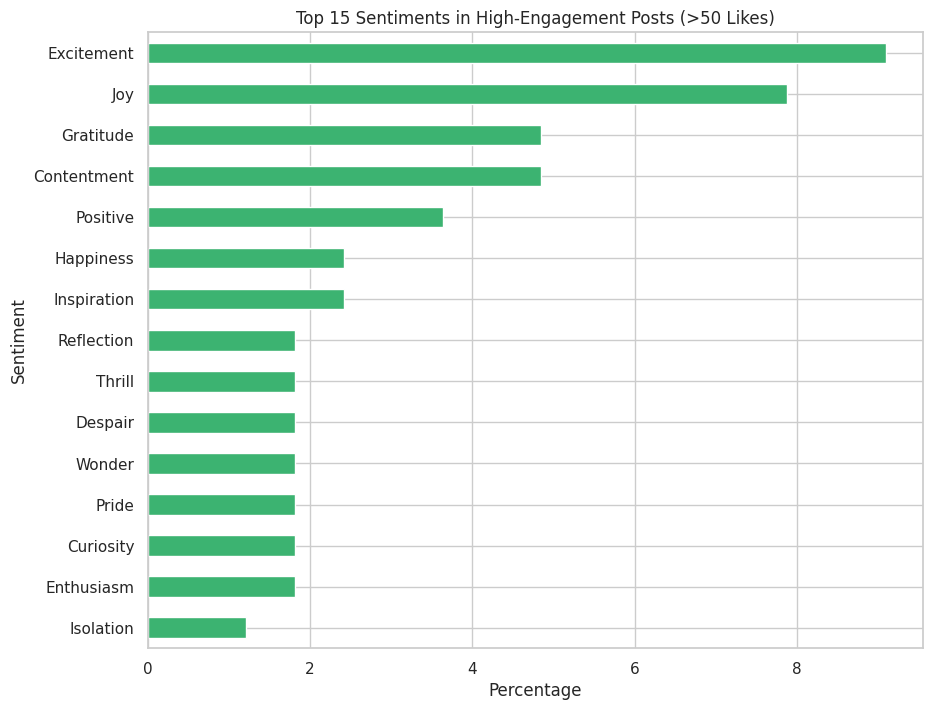

In [4]:
# Define high engagement threshold
high_engagement = df[df['Likes'] > 50]

# Calculate sentiment distribution
sentiment_distribution = high_engagement['Sentiment'].value_counts(normalize=True) * 100

# Visualize top 15 sentiments
top15_distribution = sentiment_distribution.sort_values(ascending=True).tail(15)

plt.figure(figsize=(10,8))
top15_distribution.plot(kind='barh', color='mediumseagreen')
plt.title("Top 15 Sentiments in High-Engagement Posts (>50 Likes)")
plt.xlabel("Percentage")
plt.ylabel("Sentiment")
plt.show()


> Positive emotions such as **Admiration**, **Excitement**, and **Joy** appear most frequently among highly liked posts, reinforcing the connection between uplifting content and user engagement.


## 📌 Final Summary

- User engagement (likes and retweets) shows a moderately long-tail distribution.
- Posts with **positive sentiments** (e.g., Excitement, Admiration) consistently receive higher average engagement.
- Among highly liked posts, these sentiments also dominate, suggesting a strong correlation between emotional positivity and content performance.
